In [65]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math
import os 
import seaborn as sns #for styling the plots
import warnings
import urllib.request
%matplotlib inline
import datetime as dt
from scipy import stats


## Data Analysis

In [12]:
county = pd.read_csv('Data/county_cleaned.csv', parse_dates = ['date','stsipstart', 'stsipend', 'localsipstart', 'localsipend','stbusclose', 
                'localbusclose', 'stbusopen','localbusopen','stresclose','stresopen',
                'localresclose','localresopen'])
state = pd.read_csv('Data/state_cleaned.csv')
policy = pd.read_csv('Data/policy_cleaned.csv')

/Users/amc/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (23,30,32,34,36,40,42,44,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [13]:
county.head()

,Unnamed: 0,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,...,localresopennotes,dummyresclose,dummyresopen,link,countyfips_str,statefips_str,Geo_FIPS,SE_A00001_001,SE_A00002_002,SE_A00002_003
0,0,US,United States,Alabama,Baldwin County,NaN,NaN,1003.0,2020-02-15,17.0,...,NaN,0,0,re-open plan https://baldwincountyal.gov/docs/...,3,1,1003,208107,130.9019,1589.793757
1,1,US,United States,Alabama,Baldwin County,NaN,NaN,1003.0,2020-02-16,8.0,...,NaN,0,0,re-open plan https://baldwincountyal.gov/docs/...,3,1,1003,208107,130.9019,1589.793757
2,2,US,United States,Alabama,Baldwin County,NaN,NaN,1003.0,2020-02-17,9.0,...,NaN,0,0,re-open plan https://baldwincountyal.gov/docs/...,3,1,1003,208107,130.9019,1589.793757
3,3,US,United States,Alabama,Baldwin County,NaN,NaN,1003.0,2020-02-18,7.0,...,NaN,0,0,re-open plan https://baldwincountyal.gov/docs/...,3,1,1003,208107,130.9019,1589.793757
4,4,US,United States,Alabama,Baldwin County,NaN,NaN,1003.0,2020-02-19,12.0,...,NaN,0,0,re-open plan https://baldwincountyal.gov/docs/...,3,1,1003,208107,130.9019,1589.793757


In [30]:
county.columns

Index(['Unnamed: 0', 'country_region_code', 'country_region', 'sub_region_1',
       'sub_region_2', 'metro_area', 'iso_3166_2_code', 'census_fips_code',
       'date', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'fips', 'stfips', 'stname',
       'countyfips', 'countyname', 'cityname', 'stsipstart', 'stsipend',
       'stsipnotes', 'localsipstart', 'localsipend', 'localsipnotes',
       'stbusclose', 'stbusclosenotes', 'localbusclose', 'localbusclosenotes',
       'stbusopen', 'stbusopennotes', 'localbusopen', 'localbusopennotes',
       'stresclose', 'stresclosenotes', 'stresopen', 'stresopennotes',
       'localresclose', 'localresclosenotes', 'localresopen',
       'localresopennotes', 'link', 'countyfips_str', 'st

In [29]:
county = county.drop(['dummyresclose', 'dummyresopen','dummysipstart', 
                 'dummysipend','dummybusclose', 'dummybusopen'], axis = 1)

In [15]:
county[['sub_region_1',
       'sub_region_2','date','transit_stations_percent_change_from_baseline',
       'stsipstart', 'stsipend','localsipstart', 'localsipend','stbusclose', 'stbusopen',
       'localbusclose','localbusopen','stresclose','stresopen','localresclose','localresopen']]

,sub_region_1,sub_region_2,date,transit_stations_percent_change_from_baseline,stsipstart,stsipend,localsipstart,localsipend,stbusclose,stbusopen,localbusclose,localbusopen,stresclose,stresopen,localresclose,localresopen
0,Alabama,Baldwin County,2020-02-15,8.0,2020-04-04,2020-04-30,NaT,NaT,2020-03-28,2020-04-30,NaT,NaT,2020-03-19,2020-05-11,NaT,NaT
1,Alabama,Baldwin County,2020-02-16,7.0,2020-04-04,2020-04-30,NaT,NaT,2020-03-28,2020-04-30,NaT,NaT,2020-03-19,2020-05-11,NaT,NaT
2,Alabama,Baldwin County,2020-02-17,7.0,2020-04-04,2020-04-30,NaT,NaT,2020-03-28,2020-04-30,NaT,NaT,2020-03-19,2020-05-11,NaT,NaT
3,Alabama,Baldwin County,2020-02-18,0.0,2020-04-04,2020-04-30,NaT,NaT,2020-03-28,2020-04-30,NaT,NaT,2020-03-19,2020-05-11,NaT,NaT
4,Alabama,Baldwin County,2020-02-19,8.0,2020-04-04,2020-04-30,NaT,NaT,2020-03-28,2020-04-30,NaT,NaT,2020-03-19,2020-05-11,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240875,Wyoming,Uinta County,2020-11-04,18.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2020-03-19,2020-05-15,NaT,2020-05-06
240876,Wyoming,Uinta County,2020-11-05,23.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2020-03-19,2020-05-15,NaT,2020-05-06
240877,Wyoming,Uinta County,2020-11-06,24.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2020-03-19,2020-05-15,NaT,2020-05-06
240878,Wyoming,Uinta County,2020-11-07,11.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2020-03-19,2020-05-15,NaT,2020-05-06


In [16]:
lm = smf.ols(formula='transit_stations_percent_change_from_baseline~date-1', data = county).fit()
print(lm.summary())

                                          OLS Regression Results                                         
Dep. Variable:     transit_stations_percent_change_from_baseline   R-squared:                       0.200
Model:                                                       OLS   Adj. R-squared:                  0.199
Method:                                            Least Squares   F-statistic:                     225.7
Date:                                           Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                                                   08:59:23   Log-Likelihood:            -1.1010e+06
No. Observations:                                         240880   AIC:                         2.203e+06
Df Residuals:                                             240612   BIC:                         2.205e+06
Df Model:                                                    267                                         
Covariance Type:                              

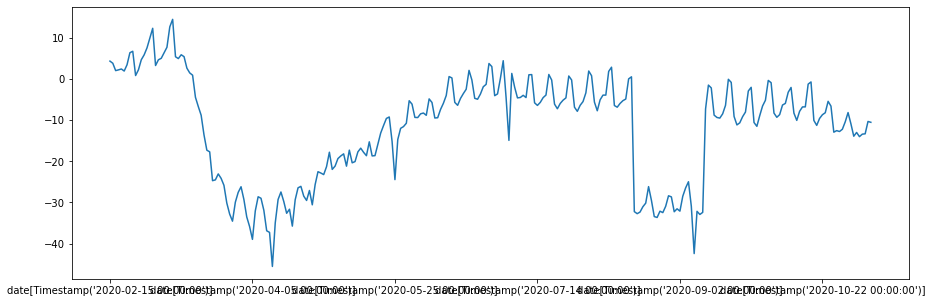

In [20]:
lm.params.plot(figsize = (15,5))

In [71]:
# creating our categorical date/lockdown variables
county['stsip_dummy'] = 'Before'
county.loc[(county['date'] >= county['stsipstart']) & (county['date'] <= county['stsipend']), 'stsip_dummy'] = 'During'
county.loc[(county['date'] > county['stsipend']), 'stsip_dummy'] = 'After'

county['localsip_dummy'] = 'Before'
county.loc[(county['date'] >= county['localsipstart']) & (county['date'] <= county['localsipend']), 'localsip_dummy'] = 'During'
county.loc[(county['date'] > county['localsipend']), 'localsip_dummy'] = 'After'

county['stbus_dummy'] = 'Before'
county.loc[(county['date'] >= county['stbusclose']) & (county['date'] <= county['stbusopen']), 'stbus_dummy'] = 'During'
county.loc[(county['date'] > county['stbusopen']), 'stbus_dummy'] = 'After'

# county['localbus_dummy'] = 'Before'
# county.loc[(county['date'] >= county['localbusstart']) & (county['date'] <= county['localbusend']), 'localbus_dummy'] = 'During'
# county.loc[(county['date'] > county['localbusend']), 'localbus_dummy'] = 'After'

county['stres_dummy'] = 'Before'
county.loc[(county['date'] >= county['stresclose']) & (county['date'] <= county['stresopen']), 'stres_dummy'] = 'During'
county.loc[(county['date'] > county['stresopen']), 'stres_dummy'] = 'After'

# county['localres_dummy'] = 'Before'
# county.loc[(county['date'] >= county['localresstart']) & (county['date'] <= county['localresend']), 'localres_dummy'] = 'During'
# county.loc[(county['date'] > county['localresend']), 'localres_dummy'] = 'After'



In [45]:
county = county[county['date'] <= dt.datetime(2020,6,15)]

In [46]:
county['stsip_dummy'].value_counts()

Before    56327
During    38750
After     25728
Name: stsip_dummy, dtype: int64

In [70]:
lm = smf.ols(formula='transit_stations_percent_change_from_baseline~stsip_dummy-1', data = county).fit()
print(lm.summary())

                                          OLS Regression Results                                         
Dep. Variable:     transit_stations_percent_change_from_baseline   R-squared:                       0.199
Model:                                                       OLS   Adj. R-squared:                  0.199
Method:                                            Least Squares   F-statistic:                 1.500e+04
Date:                                           Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                                                   09:48:04   Log-Likelihood:            -5.4512e+05
No. Observations:                                         120805   AIC:                         1.090e+06
Df Residuals:                                             120802   BIC:                         1.090e+06
Df Model:                                                      2                                         
Covariance Type:                              

In [60]:
county['stsip_dummy_prediction'] = lm.predict()

<ipython-input-60-a8b2f235ca76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county['stsip_dummy_prediction'] = lm.predict()


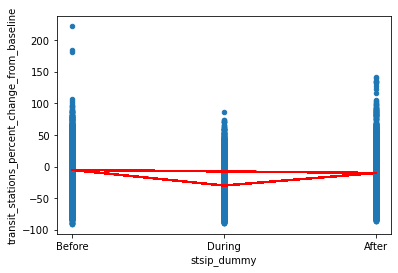

In [62]:
fig, ax = plt.subplots() #get axis to plot on
county.plot(ax=ax,kind='scatter',x='stsip_dummy', y='transit_stations_percent_change_from_baseline') #show the data
ax.plot(county['stsip_dummy'],county['stsip_dummy_prediction'],'r-'); #show the regression line

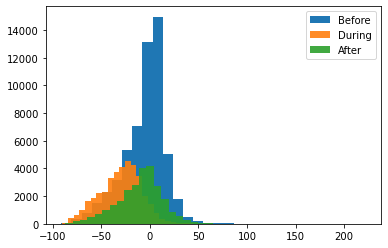

In [64]:
#histograms of daily counts in 2019 and 2018 - distributions look different
plt.hist(county.loc[county['stsip_dummy']=='Before']['transit_stations_percent_change_from_baseline'].values,bins=30,label='Before')
plt.hist(county.loc[county['stsip_dummy']=='During']['transit_stations_percent_change_from_baseline'].values,bins=30,alpha=0.9,label='During')
plt.hist(county.loc[county['stsip_dummy']=='After']['transit_stations_percent_change_from_baseline'].values,bins=30,alpha=0.9,label='After')
#plt.hist(dfTaxiDaily.loc[dfTaxiDaily['Year']==2020]['trip_count'].values,bins=30,alpha=0.5,label='2020')
plt.legend()

In [66]:
stats.ttest_ind(county.loc[county['stsip_dummy']=='Before']['transit_stations_percent_change_from_baseline'],
                county.loc[county['stsip_dummy']=='During']['transit_stations_percent_change_from_baseline'])


Ttest_indResult(statistic=173.85513864447518, pvalue=0.0)

In [67]:
stats.ttest_ind(county.loc[county['stsip_dummy']=='During']['transit_stations_percent_change_from_baseline'],
                county.loc[county['stsip_dummy']=='After']['transit_stations_percent_change_from_baseline'])

Ttest_indResult(statistic=-110.34914572631634, pvalue=0.0)

In [68]:
stats.ttest_ind(county.loc[county['stsip_dummy']=='Before']['transit_stations_percent_change_from_baseline'],
                county.loc[county['stsip_dummy']=='After']['transit_stations_percent_change_from_baseline'])

Ttest_indResult(statistic=28.33479248415365, pvalue=9.112952724013533e-176)

In [73]:
lm = smf.ols(formula='transit_stations_percent_change_from_baseline~stres_dummy-1', data = county).fit()
print(lm.summary())

                                          OLS Regression Results                                         
Dep. Variable:     transit_stations_percent_change_from_baseline   R-squared:                       0.225
Model:                                                       OLS   Adj. R-squared:                  0.225
Method:                                            Least Squares   F-statistic:                 1.749e+04
Date:                                           Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                                                   09:49:12   Log-Likelihood:            -5.4316e+05
No. Observations:                                         120805   AIC:                         1.086e+06
Df Residuals:                                             120802   BIC:                         1.086e+06
Df Model:                                                      2                                         
Covariance Type:                              

In [74]:
lm = smf.ols(formula='transit_stations_percent_change_from_baseline~stbus_dummy-1', data = county).fit()
print(lm.summary())

                                          OLS Regression Results                                         
Dep. Variable:     transit_stations_percent_change_from_baseline   R-squared:                       0.137
Model:                                                       OLS   Adj. R-squared:                  0.137
Method:                                            Least Squares   F-statistic:                     9611.
Date:                                           Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                                                   09:49:30   Log-Likelihood:            -5.4960e+05
No. Observations:                                         120805   AIC:                         1.099e+06
Df Residuals:                                             120802   BIC:                         1.099e+06
Df Model:                                                      2                                         
Covariance Type:                              